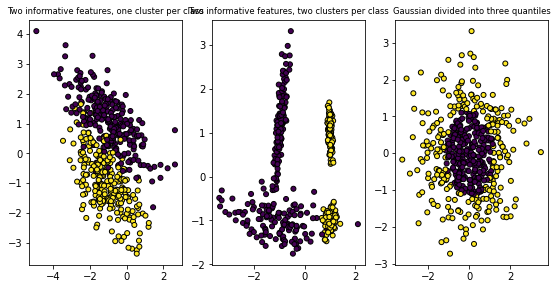

In [28]:
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
plt.figure(figsize=(8, 4))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=500,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(132)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_samples=500, n_features=2, 
                             n_redundant=0, 
                             n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


plt.subplot(133)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X3, Y3 = make_gaussian_quantiles(n_samples=500,n_features=2, n_classes=2)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')

plt.show()  # various graphs

In [29]:
# 1. dataset için eğitim ve test setlerinin oluşturulması
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)

# 2. dataset için eğitim ve test setlerinin oluşturulması
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

# 3. dataset için eğitim ve test setlerinin oluşturulması
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.33, random_state=42)

In [30]:
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(335, 2) (165, 2) (335,) (165,)


In [4]:
# import section for optimization, plotting  kütüphanelerinin  import edilmesi
import numpy as np    
# For optimization
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize   
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For generating dataset
import sklearn.datasets as dt
from sklearn.metrics import accuracy_score

# **SVM**

---



In [ ]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


def visualize_svm(x, y):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(x[:, 0], x[:, 1], marker="o", c=y)

    x0_1 = np.amin(x[:, 0])
    x0_2 = np.amax(x[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(x[:, 1])
    x1_max = np.amax(x[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

## 1.Veriseti için SVM

---



In [ ]:
Y1_train = np.where(Y1_train == 0, -1, 1)
Y1_test = np.where(Y1_test == 0, -1, 1)

In [ ]:
Y1_test

array([ 1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1])

[-1.27517572  0.00293002] -0.06800000000000005
Accuracy:  88.48484848484848 



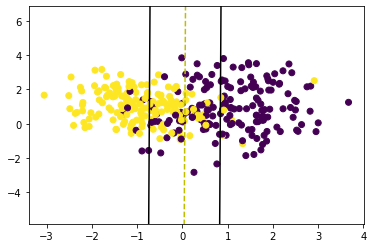

In [ ]:
clf = SVM()
clf.fit(X1_train, Y1_train)

predictions = clf.predict(X1_test)
print(clf.w, clf.b)
print("Accuracy: ", accuracy_score(Y1_test, predictions)*100, "\n")

visualize_svm(X1_train, Y1_train)

##2.Veriseti için SVM

---



In [ ]:
Y2_train = np.where(Y2_train == 0, -1, 1)
Y2_test = np.where(Y2_test == 0, -1, 1)

In [ ]:
Y2_test

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1])

[0.05681238 1.49153965] 0.055000000000000035
Accuracy:  91.51515151515152 



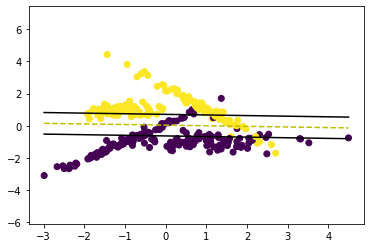

In [ ]:
clf = SVM()
clf.fit(X2_train, Y2_train)

predictions = clf.predict(X2_test)
print(clf.w, clf.b)
print("Accuracy: ", accuracy_score(Y2_test, predictions)*100, "\n")

visualize_svm(X2_train, Y2_train)

##3.Veriseti için SVM

---



In [ ]:
Y3_train = np.where(Y3_train == 0, -1, 1)
Y3_test = np.where(Y3_test == 0, -1, 1)

In [ ]:
Y3_test

array([ 1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1])

[-0.04303249  0.04608997] 0.9540000000000007
Accuracy:  45.45454545454545 



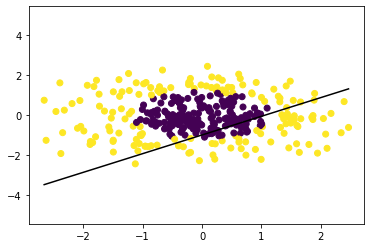

In [ ]:
clf = SVM()
clf.fit(X3_train, Y3_train)

predictions = clf.predict(X3_test)
print(clf.w, clf.b)
print("Accuracy: ", accuracy_score(Y3_test, predictions)*100, "\n")

visualize_svm(X3_train, Y3_train)

# KNN

In [5]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from math import exp

In [6]:
from collections import Counter

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy*100

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

##1.Veriseti için KNN
---

In [7]:
Y1_train = np.where(Y1_train == -1, 0, 1)
Y1_test = np.where(Y1_test == -1, 0, 1)

In [8]:
Y1_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
k = 3
clf = KNN(k=k)
clf.fit(X1_train, Y1_train)
predictions = clf.predict(Y1_test)

print("KNN classification accuracy", accuracy(Y1_test, predictions))

KNN classification accuracy 100.0


## 2.Veriseti için KNN
---

In [10]:
Y2_train = np.where(Y2_train == -1, 0, 1)
Y2_test = np.where(Y2_test == -1, 0, 1)

In [11]:
Y2_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
k = 3
clf = KNN(k=k)
clf.fit(X2_train, Y2_train)
predictions = clf.predict(Y2_test)

print("KNN classification accuracy", accuracy(Y2_test, predictions))

KNN classification accuracy 100.0


## 3.Veriseti için KNN
---

In [13]:
Y3_train = np.where(Y3_train == -1, 0, 1)
Y3_test = np.where(Y3_test == -1, 0, 1)

In [14]:
Y3_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
k = 3
clf = KNN(k=k)
clf.fit(X3_train, Y3_train)
predictions = clf.predict(Y3_test)

print("KNN classification accuracy", accuracy(Y3_test, predictions))

KNN classification accuracy 100.0


# **Logistic Regression**
---

In [17]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy*100

## 1.Veriseti için LR
---

In [18]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X1_train, Y1_train)
predictions = regressor.predict(X1_test)

print("LR Classification accuracy: ", accuracy(Y1_test, predictions))

LR Classification accuracy:  97.57575757575758


## 2.Veriseti için LR
---

In [19]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X2_train, Y2_train)
predictions = regressor.predict(X2_test)

print("LR Classification accuracy: ", accuracy(Y2_test, predictions))

LR Classification accuracy:  100.0


## 3.Veriseti için LR
---

In [21]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X3_train, Y3_train)
predictions = regressor.predict(X3_test)

print("LR Classification accuracy: ", accuracy(Y3_test, predictions))

LR Classification accuracy:  100.0


# MLP

In [22]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters


def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads


def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters


def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [23]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

## 1.Veriseti için MLP

---



In [24]:
Y1_train = Y1_train.reshape(335, 1)
Y1_train = Y1_train.T

Y1_test = Y1_test.reshape(165, 1)
Y1_test = Y1_test.T

X1_train = X1_train.T
X1_test = X1_test.T

print("x1 train: ",X1_train.shape)
print("x1 test: ",X1_test.shape)
print("y1 train: ",Y1_train.shape)
print("y1 test: ",Y1_test.shape)

x1 train:  (2, 335)
x1 test:  (2, 165)
y1 train:  (1, 335)
y1 test:  (1, 165)


Cost after iteration 0: 0.342359
Cost after iteration 100: 0.336720
Cost after iteration 200: 0.323666
Cost after iteration 300: 0.297910
Cost after iteration 400: 0.260942
Cost after iteration 500: 0.221222
Cost after iteration 600: 0.186338
Cost after iteration 700: 0.159092
Cost after iteration 800: 0.138892
Cost after iteration 900: 0.124079
Cost after iteration 1000: 0.113108
Cost after iteration 1100: 0.104831
Cost after iteration 1200: 0.098464
Cost after iteration 1300: 0.093475
Cost after iteration 1400: 0.089502
Cost after iteration 1500: 0.086294
Cost after iteration 1600: 0.083673
Cost after iteration 1700: 0.081510
Cost after iteration 1800: 0.079708
Cost after iteration 1900: 0.078196
Cost after iteration 2000: 0.076919
Cost after iteration 2100: 0.075834
Cost after iteration 2200: 0.074907
Cost after iteration 2300: 0.074111
Cost after iteration 2400: 0.073425


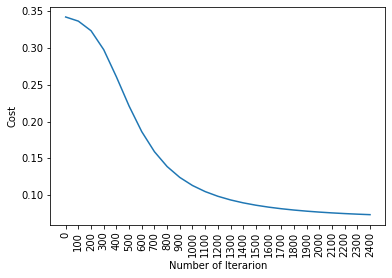

train accuracy: 94.6268656716418 %
test accuracy: 95.75757575757575 %


In [ ]:
parameters = two_layer_neural_network(X1_train, Y1_train,X1_test,Y1_test, num_iterations=2500)

## 2.Veriseti için MLP

---



In [ ]:
Y2_train = Y2_train.reshape(335, 1)
Y2_train = Y2_train.T

Y2_test = Y2_test.reshape(165, 1)
Y2_test = Y2_test.T

X2_train = X2_train.T
X2_test = X2_test.T

print("x2 train: ",X2_train.shape)
print("x2 test: ",X2_test.shape)
print("y2 train: ",Y2_train.shape)
print("y2 test: ",Y2_test.shape)

x2 train:  (2, 335)
x2 test:  (2, 165)
y2 train:  (1, 335)
y2 test:  (1, 165)


Cost after iteration 0: 0.355766
Cost after iteration 100: 0.341830
Cost after iteration 200: 0.324480
Cost after iteration 300: 0.301275
Cost after iteration 400: 0.273838
Cost after iteration 500: 0.246347
Cost after iteration 600: 0.222307
Cost after iteration 700: 0.203085
Cost after iteration 800: 0.188467
Cost after iteration 900: 0.177612
Cost after iteration 1000: 0.169621
Cost after iteration 1100: 0.163741
Cost after iteration 1200: 0.159397
Cost after iteration 1300: 0.156171
Cost after iteration 1400: 0.153760
Cost after iteration 1500: 0.151947
Cost after iteration 1600: 0.150575
Cost after iteration 1700: 0.149533
Cost after iteration 1800: 0.148736
Cost after iteration 1900: 0.148125
Cost after iteration 2000: 0.147655
Cost after iteration 2100: 0.147291
Cost after iteration 2200: 0.147010
Cost after iteration 2300: 0.146791
Cost after iteration 2400: 0.146621


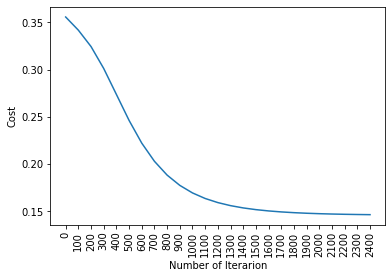

train accuracy: 87.76119402985074 %
test accuracy: 90.3030303030303 %


In [ ]:
parameters = two_layer_neural_network(X2_train, Y2_train,X2_test,Y2_test, num_iterations=2500)

## 3.Veriseti için MLP

---



In [31]:
Y3_train = Y3_train.reshape(335, 1)
Y3_train = Y3_train.T

Y3_test = Y3_test.reshape(165, 1)
Y3_test = Y3_test.T

X3_train = X3_train.T
X3_test = X3_test.T

print("x3 train: ",X3_train.shape)
print("x3 test: ",X3_test.shape)
print("y3 train: ",Y3_train.shape)
print("y3 test: ",Y3_test.shape)

x3 train:  (2, 335)
x3 test:  (2, 165)
y3 train:  (1, 335)
y3 test:  (1, 165)


Cost after iteration 0: 0.341311
Cost after iteration 100: 0.343029
Cost after iteration 200: 0.344355
Cost after iteration 300: 0.345379
Cost after iteration 400: 0.346168
Cost after iteration 500: 0.346778
Cost after iteration 600: 0.347249
Cost after iteration 700: 0.347613
Cost after iteration 800: 0.347895
Cost after iteration 900: 0.348114
Cost after iteration 1000: 0.348285
Cost after iteration 1100: 0.348419
Cost after iteration 1200: 0.348525
Cost after iteration 1300: 0.348609
Cost after iteration 1400: 0.348677
Cost after iteration 1500: 0.348733
Cost after iteration 1600: 0.348779
Cost after iteration 1700: 0.348818
Cost after iteration 1800: 0.348852
Cost after iteration 1900: 0.348883
Cost after iteration 2000: 0.348910
Cost after iteration 2100: 0.348936
Cost after iteration 2200: 0.348960
Cost after iteration 2300: 0.348983
Cost after iteration 2400: 0.349006


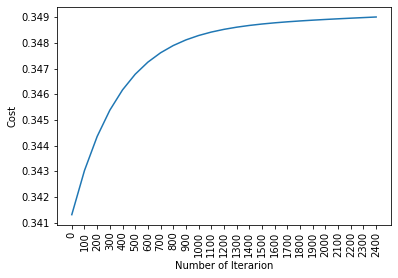

train accuracy: 61.19402985074627 %
test accuracy: 60.60606060606061 %


In [34]:
parameters = two_layer_neural_network(X3_train, Y3_train,X3_test,Y3_test, num_iterations=2500)

# **DEĞERLENDİRME**
---
---

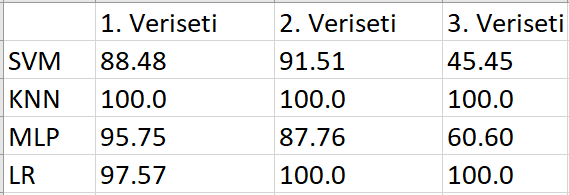

> **Her veriseti için en iyi KNN algoritması çalışmıştır**

> KNN'in dışında en başarılı sonuçları logistic regression vermiştir.

## **BAŞARI PERFORMANSLARI KARŞILAŞTIRILMAK ÜZERE STACKING B, C VE D ŞIKKINDA KODLANMIŞTIR. SONUÇLARI AŞAĞIDADIR.**

---



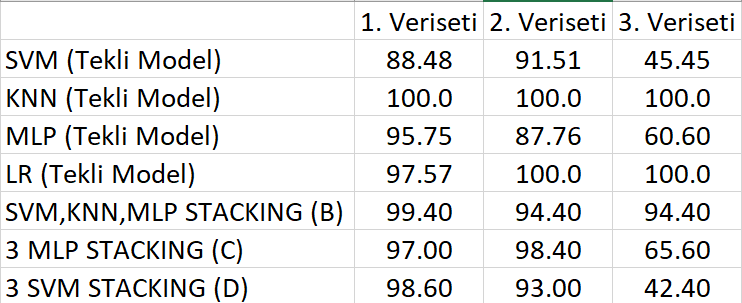

> **1.Veri seti için KNN tekli modeli verisetinin basitliği ve knn'in model yapısı itibariyle çok iyi çalışarak en iyi sonucu verdi, aynı şekilde 2. ve 3. veri seti için de. 2. ve 3. veri seti için LR da KNN gibi çok yüksek başarım gösterdi.**

> **KNN ve LR tekli modellerini bu yorumun dışında bırakırsak (1. yorum zaten yapıldı): 3 farklı güçlü SVM, KNN ve LR modeli stack edildiğinde her birinin tek başına yaptığı tahminden çok daha yüksek başarım oranını verdiği gözlemlenmiştir.** 

> **SVM algoritması yazılan koda da bağlı olarak diğerlerine nazaran daha zayıf kaldığı (özellikle 3. veri setinin iç içe yapısı göz önüne alındığında) gözlemlenmiştir. MLP de tek başına 3. veri seti için yetersiz kalmıştır ancak yanına SVM ve KNn algoritmalarının eğitim gücü dahil doluğunda birlik olduklarında başarım sonucu oldukça yükselmiştir.**

# **DIPNOT**

---



*Stacking kodu içine eğitilen ağırlıkların kodunun kaydedildiği ve o ağırlıkları döndüren bir fonksiyon ekledim (B, C ve D şıkkında). Ardından o ağırlıkları kullandım. Her şey için teşekkürler hocam. Son toplantının saati değişmiş sanırım o gün okuldaydım ders vardı katılamadım fakat sonradan izledim epey yardımı oldu. İyi günler. :)*